In [120]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [121]:
name0 = '双掺'
name1 = '掺大豆油'
name2 = '掺玉米油'
name = name2
location = f"../实验数据、论文/数据/{name}"
file_list = os.listdir(location)
cnt = 0
csvDeal = False
for i in file_list:
    file_list[cnt] = os.path.join(location , file_list[cnt])
    cnt += 1
    if ".csv" in i:
        csvDeal = True

In [122]:
if not csvDeal:
    for k in range(len(file_list)):
        file = file_list[k]
        if ".csv" in file or ".DS_Store" in file:
            continue
        try:
            ID = int(file.split(f"{name}/")[-1].split("-")[0])
        except Exception as e:
            print(file)
            raise e
        print(f"DealCSV: ID={ID}")
        resDict = {"index": [], "value": []}
        with open(file, "r", encoding='gbk') as f:
            context = f.read().split("\n")
            context = context[2:]
            for i in context:
                if len(i) == 0:
                    continue
                # print(i.split("\t"))
                try:
                    resDict['index'].append(float(i.split("\t")[0]))
                    resDict['value'].append(float(i.split("\t")[1]))
                except Exception as e:
                    print(file)
                    raise e
        df = pd.DataFrame(resDict)
        path_i = os.path.join(location, f"df_{ID}_{file.split('-')[1].split('(')[0]}.csv")
        df.to_csv(path_i)

    file_list = os.listdir(location)
    cnt = 0
    for i in file_list:
        file_list[cnt] = os.path.join(location , file_list[cnt])
        cnt += 1


DealCSV: ID=11
DealCSV: ID=59
DealCSV: ID=70
DealCSV: ID=8
DealCSV: ID=74
DealCSV: ID=44
DealCSV: ID=48
DealCSV: ID=65
DealCSV: ID=79
DealCSV: ID=51
DealCSV: ID=39
DealCSV: ID=33
DealCSV: ID=77
DealCSV: ID=26
DealCSV: ID=4


In [123]:
file_list, len(file_list)

(['../实验数据、论文/数据/掺玉米油/11-0 7.5 92.5(5)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_4_0 2.5 97.5.csv',
  '../实验数据、论文/数据/掺玉米油/df_74_0 70 30.csv',
  '../实验数据、论文/数据/掺玉米油/df_8_0 5 95.csv',
  '../实验数据、论文/数据/掺玉米油/df_33_0 15 85.csv',
  '../实验数据、论文/数据/掺玉米油/59-0 40 60(2)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/70-0 60 40(2)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_11_0 7.5 92.5.csv',
  '../实验数据、论文/数据/掺玉米油/8-0 5 95(5)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/74-0 70 30(2)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_51_0 35 65.csv',
  '../实验数据、论文/数据/掺玉米油/44-0 25 75(3)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/48-0 30 70(3)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_44_0 25 75.csv',
  '../实验数据、论文/数据/掺玉米油/65-0 50 50(2)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_59_0 40 60.csv',
  '../实验数据、论文/数据/掺玉米油/df_48_0 30 70.csv',
  '../实验数据、论文/数据/掺玉米油/79-0 90 10(2)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/51-0 35 65(3)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_65_0 50 50.csv',
  '../实验数据、论文/数据/掺玉米油/df_79_0 90 10.csv',
  '../实验数据、论文/数据/掺玉米油/39-0 20 80(3)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_70_

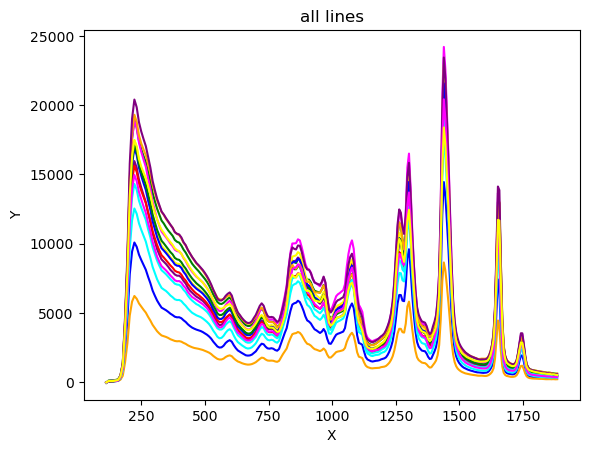

In [124]:
data = {
    # 'X': [111.5196, 120.9049, 130.2617, 139.59],
    # 'Y1': [-38.817023, 91.182967, 98.974633, 103.432967],
    # 'Y2': [10, 20, 30, 40],
    # 添加更多的Y列，每组折线的数据
    # ...
}

cnt = 0
for k in range(len(file_list)):
    file = file_list[k]
    if ".csv" not in file:
        continue
    dfi = pd.read_csv(file)
    if "X" not in data:
        data['X'] = dfi['index']
    data[f'Y{cnt}'] = dfi['value']
    cnt += 1
df = pd.DataFrame(data)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# 绘制折线图
for i, column in enumerate(df.columns[1:], start=1):
    plt.plot(df['X'], df[column], color=colors[i % len(colors)])

# 添加标签和标题
plt.xlabel('X')
plt.ylabel('Y')
plt.title('all lines')

# 显示图形
plt.show()

现在开始根据特征峰位置处理样本数据

In [125]:
CharacteristicPeak = [843,865,966,1077,1263,1301,1438,1651,1656]
eps = 10
notGoodIdentityList = [7,24,25,49,52,64,66,69,71,73,75,76,78]
file_list, len(file_list)

(['../实验数据、论文/数据/掺玉米油/11-0 7.5 92.5(5)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_4_0 2.5 97.5.csv',
  '../实验数据、论文/数据/掺玉米油/df_74_0 70 30.csv',
  '../实验数据、论文/数据/掺玉米油/df_8_0 5 95.csv',
  '../实验数据、论文/数据/掺玉米油/df_33_0 15 85.csv',
  '../实验数据、论文/数据/掺玉米油/59-0 40 60(2)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/70-0 60 40(2)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_11_0 7.5 92.5.csv',
  '../实验数据、论文/数据/掺玉米油/8-0 5 95(5)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/74-0 70 30(2)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_51_0 35 65.csv',
  '../实验数据、论文/数据/掺玉米油/44-0 25 75(3)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/48-0 30 70(3)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_44_0 25 75.csv',
  '../实验数据、论文/数据/掺玉米油/65-0 50 50(2)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_59_0 40 60.csv',
  '../实验数据、论文/数据/掺玉米油/df_48_0 30 70.csv',
  '../实验数据、论文/数据/掺玉米油/79-0 90 10(2)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/51-0 35 65(3)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_65_0 50 50.csv',
  '../实验数据、论文/数据/掺玉米油/df_79_0 90 10.csv',
  '../实验数据、论文/数据/掺玉米油/39-0 20 80(3)_RBg.dat',
  '../实验数据、论文/数据/掺玉米油/df_70_

In [126]:
summary_df = {"id": [], "大豆油浓度": [],"玉米油浓度": [], "茶油浓度": []}
for peak in CharacteristicPeak:
    summary_df[f'peak:{peak}'] = []


summary_df_mini = {"id": [], "大豆油浓度": [], "玉米油浓度": [], "茶油浓度": []}
for peak in CharacteristicPeak:
    summary_df_mini[f'peak:{peak}'] = []

for k in range(len(file_list)):
    file = file_list[k]
    if ".csv" not in file:
        continue
    per = str(file).split(".csv")[0]
    per = per.split("_")[-1]
    ID = int(file.split("_")[1])
    summary_df['id'].append(ID)
    summary_df['大豆油浓度'].append(float(per.split(" ")[0]))
    summary_df['玉米油浓度'].append(float(per.split(" ")[1]))
    summary_df['茶油浓度'].append(float(per.split(" ")[2]))

    if ID not in notGoodIdentityList:
        summary_df_mini['id'].append(k+1)
        summary_df_mini['大豆油浓度'].append(float(per.split(" ")[0]))
        summary_df_mini['玉米油浓度'].append(float(per.split(" ")[1]))
        summary_df_mini['茶油浓度'].append(float(per.split(" ")[2]))
    else:
        print(f"ID:{k+1}")

    dfi = pd.read_csv(file)
    for peakI in CharacteristicPeak:
        average_value = 0
        cnt = 0
        for indexI in dfi['index']:
            if abs(indexI-peakI) <= eps:
                average_value += float(dfi[dfi['index']==indexI]['value'])
                cnt += 1
        try:
            average_value /= cnt
        except Exception as e:
            """print(str(peakI)+"\n")
            for valueI in dfi['value']:
                print(valueI)"""
            average_value = 0
        summary_df[f'peak:{peakI}'].append(average_value)
        if ID not in notGoodIdentityList:
            summary_df_mini[f'peak:{peakI}'].append(average_value)

for i in summary_df:
    print(f"{i}:len={len(summary_df[i])}")

for i in summary_df_mini:
    print(f"{i}:len={len(summary_df_mini[i])}")

pd.DataFrame(summary_df).to_csv(f"../实验数据、论文/数据/{name}样本.csv")
pd.DataFrame(summary_df_mini).to_csv(f"../实验数据、论文/数据/{name}样本(剔除部分样本).csv")

id:len=15
大豆油浓度:len=15
玉米油浓度:len=15
茶油浓度:len=15
peak:843:len=15
peak:865:len=15
peak:966:len=15
peak:1077:len=15
peak:1263:len=15
peak:1301:len=15
peak:1438:len=15
peak:1651:len=15
peak:1656:len=15
id:len=15
大豆油浓度:len=15
玉米油浓度:len=15
茶油浓度:len=15
peak:843:len=15
peak:865:len=15
peak:966:len=15
peak:1077:len=15
peak:1263:len=15
peak:1301:len=15
peak:1438:len=15
peak:1651:len=15
peak:1656:len=15
